## K-means clusering build from scratch

<p>The problem of K means can be thought of as grouping the data into K clusters where assignment to the clusters is based on some similarity or distance measure to a centroid (more on this later). So how do we do this? Well, let’s first outline the steps involved.</p>

1. We randomly initialize the K starting centroids. Each data point is assigned to its nearest centroid.
2. The centroids are recomputed as the mean of the data points assigned to the respective cluster.
3. Repeat steps 1 and 2 until we trigger our stopping criteria.


In [11]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

<p>There are a few methods that we need to implement and these correspond to the steps we outlined above. We will implement the following 5 methods which will help us split up the algorithm into manageable parts.</p>

- Initialise_centroids
- assign_clusters
- update_centroids
- fit_kmeans
- predict

<p>Bacially,data points are assigned to the cluster closest to them or in other words the cluster which minimizes this squared distance. We can write this more formally as:</p>

$$
J=\Sigma_{n=1}^{N} \Sigma_{k=1}^{K} r_{n k}\left\|x_{n}-\mu_{k}\right\|^{2}
$$
<p>J is just the sum of squared distances of each data point to it’s assigned cluster. Where r is an indicator function equal to 1 if the data point (x_n) is assigned to the cluster (k) and 0 otherwise. </p>

**Note:** 
1. We want our class to take in some parameters such as the number of clusters, the number of iterations and the seed which we need for reproducibility. Setting the seed is an important step since we randomly initialize our centroids at the start of the algorithm. If we didn't set our seed then we may converge to a different set of clusters each time we ran the algorithm. 
2. The <b>initialise_centroids</b> method simply selects k random data points and sets them as the initial cluster centres to begin the algorithm.
3. We assign data to clusters depending on the Euclidean distance to the centre cluster.Here we use the <b>pairwise distance</b> method from sklearn which simplifies this calculation for us and returns the distances to each cluster centre. The argmin function identifies the index with the minimum distance to each cluster allowing us to assign the correct cluster label to that index.
4. To finish off one iteration of the algorithm we just need to <b>update the centroids</b> as the average of all the data points assigned to the specific cluster.
5. The <b>predict</b> method basically returns the corresponding predicted cluster label for each data point based on our algorithm. 
6. The last method in the code snippet below fits our model by calling the functions we previously defined. 


In [27]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter


    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """

        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids

    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        if data.ndim == 1 :
            data = data.reshape(-1,1)
        
        data_to_centroid = pairwise_distances(data, self.centroids, metric="euclidean")
        self.cluster_labels = np.argmin(data_to_centroid, axis=1)

        return self.cluster_labels

    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range (self.k)] )

        return self.centroids

    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        return self.assign_clusters(data)

    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)

        # Main kmeans loop
        for iter in range (self.max_iter):
            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)
            if iter % 100 == 0 :
                print("Running Model Iteration {} " .format(iter) )
        print("Model finished running")

        return self

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


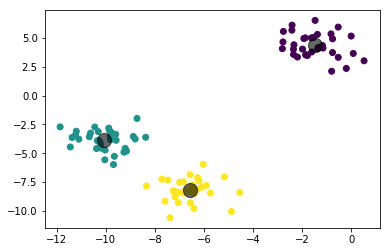

In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

kmeans = Kmeans(3,1,600)
fitted = kmeans.fit_kmeans(X)
predicted_values = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=predicted_values, cmap ='viridis')

centers = fitted.centroids
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.6)